# Categorical Data

In [1]:
import pandas as pd

In [2]:
days = ["monday", "tuesday", "wednesday", "monday", "sunday", "friday", "saturday", 
        "thursday", "tuesday", "wednesday", "sunday", "saturday", "thursday", "friday"]

In [3]:
from numpy import random

In [6]:
some_data = []
for i in range(len(days)):
    some_data.append(random.randint(100))

In [7]:
some_data

[60, 16, 13, 81, 26, 26, 21, 20, 4, 55, 74, 55, 98, 69]

In [8]:
#list comprehension 
some_data = [random.randint(100) for i in range(len(days))]

In [9]:
some_data

[24, 95, 4, 87, 56, 97, 6, 15, 14, 96, 59, 71, 33, 68]

In [10]:
df = pd.DataFrame(list(zip(days, some_data)), columns = ["days", "some_data"])

In [12]:
df

,days,some_data
0,monday,24
1,tuesday,95
2,wednesday,4
3,monday,87
4,sunday,56
5,friday,97
6,saturday,6
7,thursday,15
8,tuesday,14
9,wednesday,96


## Using .map( ) method

In [13]:
dmap = {'sunday':0,'monday':1,'tuesday':2,'wednesday':3,'thursday':4,'friday':5,'saturday':6}
df['days_num'] = df['days'].map(dmap)

In [15]:
df

,days,some_data,days_num
0,monday,24,1
1,tuesday,95,2
2,wednesday,4,3
3,monday,87,1
4,sunday,56,0
5,friday,97,5
6,saturday,6,6
7,thursday,15,4
8,tuesday,14,2
9,wednesday,96,3


In [16]:
yn = ["yes", "no"]

In [17]:
yn_data = []
for i in range(len(df)):
    yn_data.append(random.choice(yn))

In [18]:
yn_data

['yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes']

In [19]:
yn_data = [random.choice(yn) for i in range(len(df))]

In [20]:
yn_data

['no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes']

In [21]:
df['yn_data'] = yn_data

In [22]:
df

,days,some_data,days_num,yn_data
0,monday,24,1,no
1,tuesday,95,2,no
2,wednesday,4,3,no
3,monday,87,1,yes
4,sunday,56,0,no
5,friday,97,5,yes
6,saturday,6,6,yes
7,thursday,15,4,no
8,tuesday,14,2,no
9,wednesday,96,3,yes


## Using .apply( ) method

In [23]:
def zero_one(x):
    if x == "yes":
        return 1
    else:
        return 0

In [24]:
df["yn_data"] = df["yn_data"].apply(zero_one)

In [26]:
df

,days,some_data,days_num,yn_data
0,monday,24,1,0
1,tuesday,95,2,0
2,wednesday,4,3,0
3,monday,87,1,1
4,sunday,56,0,0
5,friday,97,5,1
6,saturday,6,6,1
7,thursday,15,4,0
8,tuesday,14,2,0
9,wednesday,96,3,1


## One-Hot Encoding

In [28]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['days'], prefix = ['weekdays'])

df_onehot

,some_data,days_num,yn_data,weekdays_friday,weekdays_monday,weekdays_saturday,weekdays_sunday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday
0,24,1,0,0,1,0,0,0,0,0
1,95,2,0,0,0,0,0,0,1,0
2,4,3,0,0,0,0,0,0,0,1
3,87,1,1,0,1,0,0,0,0,0
4,56,0,0,0,0,0,1,0,0,0
5,97,5,1,1,0,0,0,0,0,0
6,6,6,1,0,0,1,0,0,0,0
7,15,4,0,0,0,0,0,1,0,0
8,14,2,0,0,0,0,0,0,1,0
9,96,3,1,0,0,0,0,0,0,1


In [29]:
df_onehot_sklearn = df.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_onehot_sklearn['days'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

In [30]:
lb_results_df.head()

,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [31]:
result_df = pd.concat([df_onehot_sklearn, lb_results_df], axis=1)

In [32]:
result_df.head()

,days,some_data,days_num,yn_data,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,monday,24,1,0,0,1,0,0,0,0,0
1,tuesday,95,2,0,0,0,0,0,0,1,0
2,wednesday,4,3,0,0,0,0,0,0,0,1
3,monday,87,1,1,0,1,0,0,0,0,0
4,sunday,56,0,0,0,0,0,1,0,0,0


In [33]:
some_data_dict = {"some_data1": [], "some_data2": [], "some_data3": []}
for i in range(len(df)):
    some_data_dict["some_data1"].append(random.randn())
    some_data_dict["some_data2"].append(random.randint(1000000))
    some_data_dict["some_data3"].append(random.randint(1000))

In [34]:
df2 = pd.DataFrame(some_data_dict)
df= pd.concat([df, df2], axis =1)

In [35]:
df

,days,some_data,days_num,yn_data,some_data1,some_data2,some_data3
0,monday,24,1,0,0.104428,868002,980
1,tuesday,95,2,0,0.548115,928199,868
2,wednesday,4,3,0,-1.136905,597124,804
3,monday,87,1,1,0.848693,37712,126
4,sunday,56,0,0,-0.658509,182148,214
5,friday,97,5,1,-0.363065,795971,815
6,saturday,6,6,1,0.004169,43699,408
7,thursday,15,4,0,1.122582,776338,610
8,tuesday,14,2,0,-1.408698,58955,892
9,wednesday,96,3,1,0.380029,134979,167


# Normalizing

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

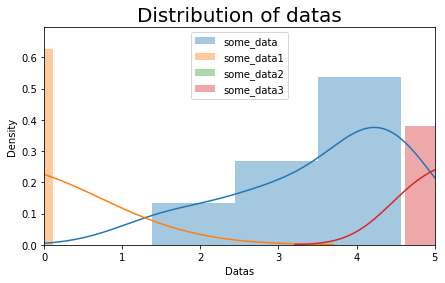

In [39]:
plt.figure(figsize=(7,4))
sns.distplot(df.some_data, label='some_data')
sns.distplot(df.some_data1, label='some_data1')
sns.distplot(df.some_data2, label='some_data2')
sns.distplot(df.some_data3, label='some_data3')
plt.title('Distribution of datas', fontdict={'fontsize': 20})
plt.xlabel('Datas')
plt.xlim(0, 5)
plt.legend()
plt.show()

In [40]:
import numpy as np

In [41]:
df.some_data = np.log(df.some_data)
df.some_data1 = np.log(df.some_data1)
df.some_data2 = np.log(df.some_data2)
df.some_data3 = np.log(df.some_data3)

In [42]:
df

,days,some_data,days_num,yn_data,some_data1,some_data2,some_data3
0,monday,1.156269,1,0,NaN,2.615493,1.929716
1,tuesday,1.515979,2,0,NaN,2.620384,1.911938
2,wednesday,0.326634,3,0,NaN,2.587755,1.900554
3,monday,1.496473,1,1,NaN,2.354962,1.576146
4,sunday,1.392612,0,0,NaN,2.494244,1.680078
5,friday,1.520544,5,1,NaN,2.609137,1.902583
6,saturday,0.583198,6,1,NaN,2.368848,1.793636
7,thursday,0.996229,4,0,-2.157345,2.607297,1.858399
8,tuesday,0.970422,2,0,NaN,2.396488,1.915961
9,wednesday,1.518276,3,1,NaN,2.469190,1.632763


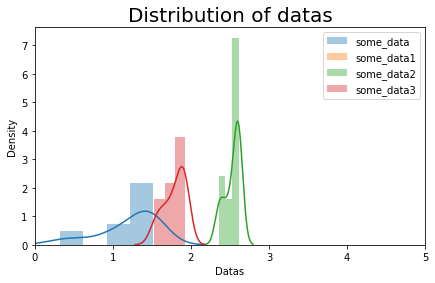

In [43]:
plt.figure(figsize=(7,4))
sns.distplot(df.some_data, label='some_data')
sns.distplot(df.some_data1, label='some_data1')
sns.distplot(df.some_data2, label='some_data2')
sns.distplot(df.some_data3, label='some_data3')
plt.title('Distribution of datas', fontdict={'fontsize': 20})
plt.xlabel('Datas')
plt.xlim(0, 5)
plt.legend()
plt.show()

In [44]:
df.some_data=(df.some_data - df.some_data.min())/(df.some_data.max() - df.some_data.min())
#df.some_data1=(df.some_data1-df.some_data1.min())/(df.some_data1.max()-df.some_data1.min())
df.some_data2=(df.some_data2-df.some_data2.min())/(df.some_data2.max()-df.some_data2.min())
df.some_data3=(df.some_data3-df.some_data3.min())/(df.some_data3.max()-df.some_data3.min())

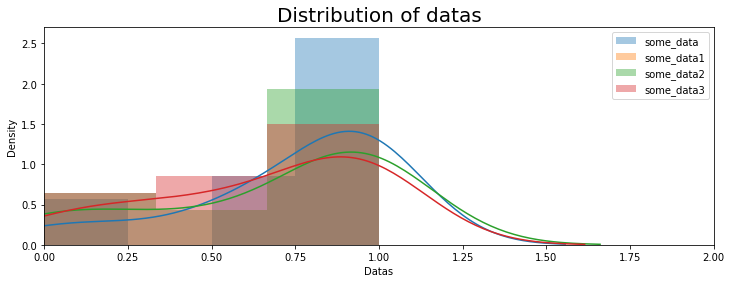

In [45]:
plt.figure(figsize=(12,4))
sns.distplot(df.some_data, label='some_data')
sns.distplot(df.some_data1, label='some_data1')
sns.distplot(df.some_data2, label='some_data2')
sns.distplot(df.some_data3, label='some_data3')
plt.title('Distribution of datas', fontdict={'fontsize': 20})
plt.xlabel('Datas')
plt.xlim(0, 2)
plt.legend()
plt.show()

In [46]:
df

,days,some_data,days_num,yn_data,some_data1,some_data2,some_data3
0,monday,0.694889,1,0,NaN,0.981570,1.000000
1,tuesday,0.996177,2,0,NaN,1.000000,0.955361
2,wednesday,0.000000,3,0,NaN,0.877067,0.926774
3,monday,0.979839,1,1,NaN,0.000000,0.112181
4,sunday,0.892847,0,0,NaN,0.524756,0.373156
5,friday,1.000000,5,1,NaN,0.957625,0.931870
6,saturday,0.214894,6,1,NaN,0.052316,0.658300
7,thursday,0.560842,4,0,NaN,0.950693,0.820922
8,tuesday,0.539227,2,0,NaN,0.156451,0.965462
9,wednesday,0.998101,3,1,NaN,0.430362,0.254346


List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.
<br>Example:
<br>Based on a list of fruits, you want a new list, containing only the fruits with the letter "a" in the name. Without list comprehension you will have to write a for statement with a conditional test inside:


In [53]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
newlist = []

for x in fruits:
    if "a" in x:
        newlist.append(x)

newlist

['apple', 'banana', 'mango']

With list comprehension you can do all that with only one line of code:

In [43]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

newlist = [x for x in fruits if "a" in x]
newlist

['apple', 'banana', 'mango']

The condition is like a filter that only accepts the items that valuate to True.
<br> Only accept items that are not "apple":

In [48]:
newlist = [x for x in fruits if x != "apple"]

In [49]:
newlist

['banana', 'cherry', 'kiwi', 'mango']

The condition if x != "apple"  will return True for all elements other than "apple", making the new list contain all fruits except "apple".
<br>
<br>The condition is optional and can be omitted:

In [47]:
newlist = [x for x in fruits]
newlist

['apple', 'banana', 'cherry', 'kiwi', 'mango']

### Iterable
The iterable can be any iterable object, like a list, tuple, set etc.

You can use the range() function to create an iterable:

In [50]:
newlist = [x for x in range(10)]

In [51]:
newlist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
newlist = [x for x in range(10) if x < 5]

In [48]:
new_evenlist = [x for x in range(100) if x%2 == 0]

In [50]:
#new_evenlist

In [53]:
newlist

[0, 1, 2, 3, 4]

### Expression
The expression is the current item in the iteration, but it is also the outcome, which you can manipulate before it ends up like a list item in the new list:

Set the values in the new list to upper case:

In [54]:
newlist = [x.upper() for x in fruits]

In [55]:
newlist

['APPLE', 'BANANA', 'CHERRY', 'KIWI', 'MANGO']

In [56]:
new_newlist = [x.lower() for x in newlist]
new_newlist

['apple', 'banana', 'cherry', 'kiwi', 'mango']

You can set the outcome to whatever you like:

In [56]:
newlist = ['hello' for x in fruits]

In [57]:
newlist

['hello', 'hello', 'hello', 'hello', 'hello']

The expression can also contain conditions, not like a filter, but as a way to manipulate the outcome:

In [58]:
newlist = [x if x != "banana" else "orange" for x in fruits] #return orange instead of banana

In [59]:
newlist

['apple', 'orange', 'cherry', 'kiwi', 'mango']